In [1]:
from tensorly.metrics.regression import RMSE
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from nn_hals_parafac_normalization_comparison import *
#parameters
init='svd'
svd='numpy_svd'
rank=10

#hyperspectral image
mat = scipy.io.loadmat('/home/ctuna/tensoptly/benchmark_data/Hyperspectral/Indian_pines_corrected.mat')
image=mat['indian_pines_corrected']

tensor=tl.tensor(image,dtype='float')

1. Method from PR
2. Inner loop normalization with last factor normalization after inner loop
3. Normalization at the end
4. 2 and 3 together

In [2]:
#normalized improved nonnegative parafac hals result
tic = time.time()
tensornorm1, errorsnorm1, weights_iter1 = nn_hals_normalize1(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm1, factorsnorm1 = tensornorm1
cp_reconstructionnorm1 = tl.cp_to_tensor((weightsnorm1, factorsnorm1))
time_cp1 = time.time()-tic

#normalized improved nonnegative parafac hals result
tic = time.time()
tensornorm2, errorsnorm2, weights_iter2 = nn_hals_normalize2(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm2, factorsnorm2 = tensornorm2
cp_reconstructionnorm2 = tl.cp_to_tensor((weightsnorm2, factorsnorm2))
time_cp2 = time.time()-tic

#normalized improved nonnegative parafac hals result
tic = time.time()
tensornorm3, errorsnorm3, weights_iter3 = nn_hals_normalize3(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm3, factorsnorm3 = tensornorm3
cp_reconstructionnorm3 = tl.cp_to_tensor((weightsnorm3, factorsnorm3))
time_cp3 = time.time()-tic

#normalized improved nonnegative parafac hals result
tic = time.time()
tensornorm4, errorsnorm4, weights_iter4 = nn_hals_normalize4(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm4, factorsnorm4 = tensornorm4
cp_reconstructionnorm4 = tl.cp_to_tensor((weightsnorm4, factorsnorm4))
time_cp4 = time.time()-tic

# Error per iteration 

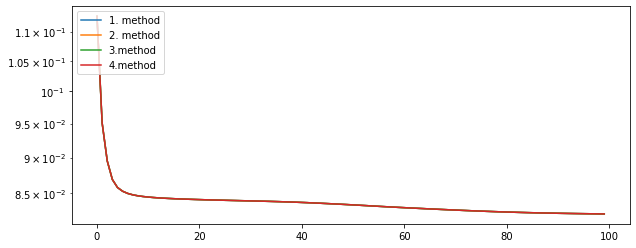

In [3]:
each_iteration(errorsnorm1, errorsnorm2, errorsnorm3, errorsnorm4)

# Weights per iteration 

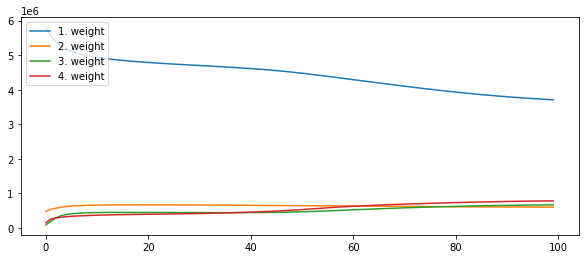

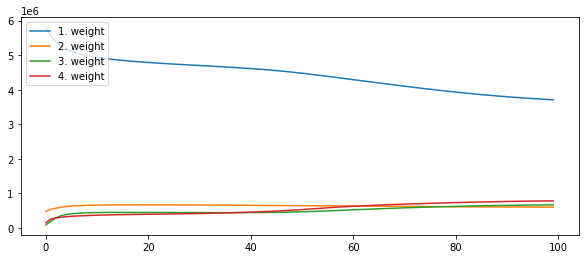

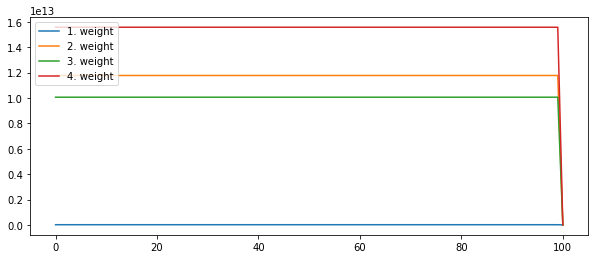

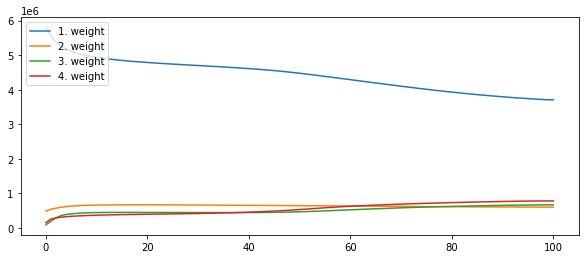

In [4]:
plot_weights(weights_iter1)
plot_weights(weights_iter2)
plot_weights(weights_iter3)
plot_weights(weights_iter4)

# Last weights

In [5]:
print(weightsnorm1[:5])
print(weightsnorm2[:5])
print(weightsnorm3[:5])
print(weightsnorm4[:5])

[3708080.07975717  599261.99163389  665042.14098348  778898.96997351
  570514.41018523]
[3708080.07975712  599261.9916339   665042.14098348  778898.96997351
  570514.41018524]
[3708080.07975707  599261.99163396  665042.14098349  778898.96997349
  570514.41018529]
[3708080.07975719  599261.99163387  665042.14098354  778898.96997353
  570514.41018525]


# Mean of factors

In [6]:
print(tl.mean(factorsnorm1[0]), tl.mean(factorsnorm1[1]), tl.mean(factorsnorm1[2]))
print(tl.mean(factorsnorm2[0]), tl.mean(factorsnorm2[1]), tl.mean(factorsnorm2[2]))
print(tl.mean(factorsnorm3[0]), tl.mean(factorsnorm3[1]), tl.mean(factorsnorm3[2]))
print(tl.mean(factorsnorm4[0]), tl.mean(factorsnorm4[1]), tl.mean(factorsnorm4[2]))

0.06985911330268771 0.06325955745288095 0.05021446239155175
0.06985911330268749 0.06325955745288142 0.050214462391551765
0.06985911330268799 0.06325955745288094 0.05021446239155191
0.06985911330268728 0.06325955745288084 0.05021446239155165


In [7]:
print(RMSE(tensor,cp_reconstructionnorm1))
print(RMSE(tensor,cp_reconstructionnorm2))
print(RMSE(tensor,cp_reconstructionnorm3))
print(RMSE(tensor,cp_reconstructionnorm4))

254.50190169285653
254.50190169285662
254.50190169285628
254.50190169285682


In [8]:
print(str(time_cp1))
print(str(time_cp2))
print(str(time_cp3))
print(str(time_cp4))

61.619056224823
57.92060041427612
57.535738945007324
62.09890699386597
